# [02. Intro to Data Structures](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html)

In [3]:
import numpy as np
import pandas as pd

Here is a basic tenet to keep in mind: __data alignment is intrinsic__. The link between labels and data will not be broken unless done so explicitly by you.

We’ll give a brief intro to the data structures, then consider all of the broad categories of functionality and methods in separate sections.

## 1. Series
[Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series) is a **one-dimensional labeled array** capable of holding **any data type (integers, strings, floating point numbers, Python objects, etc.)**. The **axis labels** are collectively referred to as the __index__. The basic method to create a Series is to call:

__s = pd.Series(data, index=index)__

Here, **data can be** many different things:
1. **a Python dict**
2. **an ndarray**
3. **a scalar value (like 5)**

The passed __index__ is **a list of axis labels**. Thus, this separates into a few cases depending on what __data is__:

### 1.1 Series Creation

#### 1.1.1 From dict
+ Series can be instantiated from dicts:

In [6]:
# without index
d = {'b': 1, 'a': 0, 'c': 2}
pd.Series(d)

b    1
a    0
c    2
dtype: int64

###### Note
When the data is a dict, and an index is not passed, the Series index will be ordered by the dict’s insertion order, if you’re using Python version >= 3.6 and Pandas version >= 0.23.

If you’re using Python < 3.6 or Pandas < 0.23, and an index is not passed, the Series index will be the lexically ordered list of dict keys.

In the example above, if you were on a Python version lower than 3.6 or a Pandas version lower than 0.23, the Series would be ordered by the lexical order of the dict keys (i.e. ['a', 'b', 'c'] rather than ['b', 'a', 'c']).

If an index is passed, the values in data corresponding to the labels in the index will be pulled out.

In [7]:
# without index
d = {'c': 2., 'b': 1., 'a': 0.}
pd.Series(d)

c    2.0
b    1.0
a    0.0
dtype: float64

In [7]:
# with index
d = {'c': 2., 'b': 1., 'a': 0.}
pd.Series(d, index=['b', 'c', 'd', 'a'])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

###### Note
**NaN (not a number)** is the standard **missing** data marker used in pandas.

#### 1.1.2 From ndarray
+ If data is an **ndarray, __index__ must be the same length as data**. If no index is passed, one will be created having values [0, ..., len(data) - 1].

In [129]:
import numpy
# help(np.array)

In [33]:
# Example 1 from help(np.array)
print(np.array([1, 2, 3]))
np.array([1, 2, 3]).shape

[1 2 3]


(3,)

In [45]:
# Example 2 from help(np.array)
# Upcasting:
print(np.array([1, 2, 3.0])); print('-'*20)
print(np.array([1, 2, 3.0]).shape); print('-'*20)
print(np.array([1, 2, 3.0]).size)

[1. 2. 3.]
--------------------
(3,)
--------------------
3


In [42]:
# Example 3 from help(np.array)
# More than one dimension:
print(np.array([[1, 2], [3, 4]])); print('-'*20)
print(np.array([[1, 2], [3, 4]]).shape); print('-'*20)
print(np.array([[1, 2], [3, 4]]).size)

[[1 2]
 [3 4]]
--------------------
(2, 2)
--------------------
4


In [31]:
# print(help(np.array))

In [50]:
# Demonstration of basic array characteristics
import numpy as np
array = np.array([ 1, 2, 3, 4])
print(array)
print("type(array): ", type(array))
print("array.ndim: ", array.ndim)
print("array.shape: ", array.shape)
print("Sarray.size: ", array.size)
print("array.dtype: ", array.dtype)

[1 2 3 4]
type(array):  <class 'numpy.ndarray'>
array.ndim:  1
array.shape:  (4,)
Sarray.size:  4
array.dtype:  int32


In [49]:
array = np.array([[ 1, 2, 3, 4], [ 5, 6, 7, 8]])
print(array)
print("type(array): ", type(array))
print("array.ndim: ", array.ndim)
print("array.shape: ", array.shape)
print("Sarray.size: ", array.size)
print("array.dtype: ", array.dtype)

[[1 2 3 4]
 [5 6 7 8]]
type(array):  <class 'numpy.ndarray'>
array.ndim:  2
array.shape:  (2, 4)
Sarray.size:  8
array.dtype:  int32


In [117]:
# np.random.randn(): Return a sample (or samples) from the "standard normal" 
# distribution.
# help(np.random.randn)

In [52]:
# To create a Series from an ndarray, index must be the same length as data
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

a   -1.369743
b   -0.517417
c   -0.429519
d    0.503910
e   -0.028571
dtype: float64

In [53]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [54]:
# If no index is passed, one will be created having values [0, ..., len(data)-1]
pd.Series(np.random.randn(5))

0    0.348852
1    0.285942
2   -0.805834
3    0.420724
4    0.450652
dtype: float64

###### Note
pandas supports non-unique index values. If an operation that does not support duplicate index values is attempted, an exception will be raised at that time. The reason for being lazy is nearly all performance-based (there are many instances in computations, like parts of GroupBy, where the index is not used).

#### 1.1.3 From scalar value
+ If data is a scalar value, an index must be provided. The value will be repeated to match the length of __index__.

In [15]:
pd.Series(5., index=['a', 'b', 'c', 'd', 'e'])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

### 1.2 Series is ndarray-like
+ Series acts very similarly to a ndarray, and is a valid argument to most NumPy functions. However, operations such as slicing will also slice the index.

In [59]:
s = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])
print(s)

a    1
b    2
c    3
d    4
e    5
dtype: int64


In [67]:
s = pd.Series((1, 2, 3, 4, 5), index=['a', 'b', 'c', 'd', 'e'])
print(s); print('-'*40)
print(s[0]); print('-'*40)
print(s[:3])

a    1
b    2
c    3
d    4
e    5
dtype: int64
----------------------------------------
1
----------------------------------------
a    1
b    2
c    3
dtype: int64


In [69]:
print(s); print('-'*40)
print(s[s > s.median()])

a    1
b    2
c    3
d    4
e    5
dtype: int64
----------------------------------------
d    4
e    5
dtype: int64


In [74]:
print(s); print('-'*40)
print(s[[4, 3, 1]])

a    1
b    2
c    3
d    4
e    5
dtype: int64
----------------------------------------
e    5
d    4
b    2
dtype: int64


In [51]:
# To see the documentation for a specific ufunc, use `info`:
# np.info(np.exp) # Calculate the exponential of all elements in the input array.

In [78]:
# np.info(np.exp)

In [81]:
# np.info(np.exp): Calculate the exponential of all elements 
#                  in the input array.
print(s); print('-'*40)
print(np.exp(s))

a    1
b    2
c    3
d    4
e    5
dtype: int64
----------------------------------------
a      2.718282
b      7.389056
c     20.085537
d     54.598150
e    148.413159
dtype: float64


###### Note
+ We will address array-based indexing like s[[4, 3, 1]] in [section](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing).

###### Like a NumPy array, a pandas Series has a dtype.

In [82]:
s.dtype

dtype('int64')

This is often a NumPy dtype. However, pandas and 3rd-party libraries extend NumPy’s type system in a few places, in which case the dtype would be a [ExtensionDtype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.api.extensions.ExtensionDtype.html#pandas.api.extensions.ExtensionDtype). Some examples within pandas are [Categorical data](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html#categorical) and [Nullable integer data type](https://pandas.pydata.org/pandas-docs/stable/user_guide/integer_na.html#integer-na). See [dtypes](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-dtypes) for more.

If you need the actual array backing a Series, use [Series.array](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.array.html#pandas.Series.array).

In [84]:
# Series.array:
s = pd.Series((1, 2, 3, 4, 5), index=['a', 'b', 'c', 'd', 'e'])
print(s); print('-'*40)
print(s.array)  # no index returned

a    1
b    2
c    3
d    4
e    5
dtype: int64
----------------------------------------
<PandasArray>
[1, 2, 3, 4, 5]
Length: 5, dtype: int64


Accessing the array can be useful when you need to do some operation without the index (to disable [automatic alignment](https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html#dsintro-alignment), for example).

[Series.array](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.array.html#pandas.Series.array) will always be an [ExtensionArray](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.api.extensions.ExtensionArray.html#pandas.api.extensions.ExtensionArray). Briefly, an ExtensionArray is a thin wrapper around one or more concrete arrays like a [numpy.ndarray](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html#numpy.ndarray). Pandas knows how to take an ExtensionArray and store it in a Series or a column of a DataFrame. See [dtypes](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-dtypes) for more.

While Series is ndarray-like, if you need an actual ndarray, then use [Series.to_numpy()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_numpy.html#pandas.Series.to_numpy).

In [86]:
x = s.to_numpy()
print(type(s))   # Series
print(type(x))   # ndarray

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


Even if the Series is backed by a [ExtensionArray](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.api.extensions.ExtensionArray.html#pandas.api.extensions.ExtensionArray), [Series.to_numpy()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_numpy.html#pandas.Series.to_numpy) will return a NumPy ndarray.

### 1.3 Series is dict-like
+ A Series is like a fixed-size dict in that you can get and set values by index label:

In [88]:
s = pd.Series((1, 2, 3, 4, 5), index=['a', 'b', 'c', 'd', 'e'])
print(s)

a    1
b    2
c    3
d    4
e    5
dtype: int64


In [91]:
print(s); print('-'*40)
print(s['a'])

a    1
b    2
c    3
d    4
e    5
dtype: int64
----------------------------------------
1


In [92]:
print(s)
s['e'] = 12.
print('-'*40)
print(s)

a    1
b    2
c    3
d    4
e    5
dtype: int64
----------------------------------------
a     1
b     2
c     3
d     4
e    12
dtype: int64


In [94]:
print(s); print('-'*40)
print('e' in s)

a     1
b     2
c     3
d     4
e    12
dtype: int64
----------------------------------------
True


In [95]:
print(s); print('-'*40)
print('f' in s)

a     1
b     2
c     3
d     4
e    12
dtype: int64
----------------------------------------
False


In [97]:
# If a label is not contained, an exception is raised:
print(s); print('-'*40)
orint(s['f'])

a     1
b     2
c     3
d     4
e    12
dtype: int64
----------------------------------------


NameError: name 'orint' is not defined

In [99]:
# Using the get method, a missing label will return None 
# or specified default:
print(s); print('-'*40)
print(s.get('f'))

a     1
b     2
c     3
d     4
e    12
dtype: int64
----------------------------------------
None


In [100]:
# Using the get method, a missing label will return None or specified default:
print(s); print('-'*40)
print(s.get('f', np.nan))

a     1
b     2
c     3
d     4
e    12
dtype: int64
----------------------------------------
nan


See also the [section on attribute access](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-attribute-access).

In [101]:
np.random.seed(1)
dates = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randint(0, 11, size=(8, 4)),
                  index=dates, columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2000-01-01,5,8,9,5
2000-01-02,0,0,1,7
2000-01-03,6,9,2,4
2000-01-04,5,2,4,10
2000-01-05,2,4,7,7
2000-01-06,9,1,7,0
2000-01-07,6,9,9,7
2000-01-08,6,9,1,0


In [104]:
sa = pd.Series([1, 2, 3], index=list('abc'))
print(sa); print('-'*40)
print(sa.b)

a    1
b    2
c    3
dtype: int64
----------------------------------------
2


In [8]:
sa.a = 5
sa

a    5
b    2
c    3
dtype: int64

In [107]:
print(df); print('-'*40)
dfa = df.copy()
print(df)

            A  B  C   D
2000-01-01  5  8  9   5
2000-01-02  0  0  1   7
2000-01-03  6  9  2   4
2000-01-04  5  2  4  10
2000-01-05  2  4  7   7
2000-01-06  9  1  7   0
2000-01-07  6  9  9   7
2000-01-08  6  9  1   0
----------------------------------------
            A  B  C   D
2000-01-01  5  8  9   5
2000-01-02  0  0  1   7
2000-01-03  6  9  2   4
2000-01-04  5  2  4  10
2000-01-05  2  4  7   7
2000-01-06  9  1  7   0
2000-01-07  6  9  9   7
2000-01-08  6  9  1   0


In [108]:
dfa.A

2000-01-01    5
2000-01-02    0
2000-01-03    6
2000-01-04    5
2000-01-05    2
2000-01-06    9
2000-01-07    6
2000-01-08    6
Freq: D, Name: A, dtype: int32

In [109]:
dfa.A = list(range(len(dfa.index)))  # ok if A already exists
print(dfa)

            A  B  C   D
2000-01-01  0  8  9   5
2000-01-02  1  0  1   7
2000-01-03  2  9  2   4
2000-01-04  3  2  4  10
2000-01-05  4  4  7   7
2000-01-06  5  1  7   0
2000-01-07  6  9  9   7
2000-01-08  7  9  1   0


In [119]:
print(df[0:3]); print('-'*40)
dfa = df[0:3].copy()
dfa['A'] = list(range(len(dfa.index)))  # use this form to create a new column
print(dfa)

            A  B  C  D
2000-01-01  5  8  9  5
2000-01-02  0  0  1  7
2000-01-03  6  9  2  4
----------------------------------------
            A  B  C  D
2000-01-01  0  8  9  5
2000-01-02  1  0  1  7
2000-01-03  2  9  2  4


### 1.4 Vectorized operations and label alignment with Series
+ When working with raw NumPy arrays, looping through value-by-value is usually not necessary. The same is true when working with Series in pandas. Series can also be passed into most NumPy methods expecting an ndarray.

In [120]:
s = pd.Series((1, 2, 3, 4, 5), index=['a', 'b', 'c', 'd', 'e'])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [121]:
s + s

a     2
b     4
c     6
d     8
e    10
dtype: int64

In [122]:
s * 2

a     2
b     4
c     6
d     8
e    10
dtype: int64

In [130]:
print(s[2:]); print('-'*40)
print(s[:-2]); print('-'*40)
print(s[2:] + s[:-2])

c    3
d    4
e    5
dtype: int64
----------------------------------------
a    1
b    2
c    3
dtype: int64
----------------------------------------
a    NaN
b    NaN
c    6.0
d    NaN
e    NaN
dtype: float64


###### Note
In general, we chose to make the default result of operations between differently indexed objects yield the __union__ of the indexes in order to avoid loss of information. Having an index label, though the data is missing, is typically important information as part of a computation. You of course have the option of dropping labels with missing data via the __dropna__ function.

### 1.5 Name attribute
+ Series can also have a name attribute:

In [15]:
s = pd.Series(np.random.randn(5), name='something')
# s = pd.Series((1, 2, 3, 4, 5), index=['a', 'b', 'c', 'd', 'e'])
s

0   -0.379270
1    1.833138
2   -1.142003
3    0.308943
4    0.866627
Name: something, dtype: float64

In [14]:
s.name

'something'

The Series name will be assigned automatically in many cases, in particular when taking 1D slices of DataFrame as you will see below.

You can rename a Series with the [pandas.Series.rename()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rename.html#pandas.Series.rename) method.

In [16]:
# Note that s and s2 refer to different objects.
s2 = s.rename("different")
s2.name

'different'

###### Note that s and s2 refer to different objects.

## 2. DataFrame
DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:

+ Dict of 1D ndarrays, lists, dicts, or Series
+ 2-D numpy.ndarray
+ [Structured or record](https://docs.scipy.org/doc/numpy/user/basics.rec.html) ndarray
+ A Series
+ Another DataFrame

Along with the data, you can optionally pass **index** (row labels) and **columns** (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

If axis labels are not passed, they will be constructed from the input data based on common sense rules.

###### Note
When the data is a dict, and columns is not specified, the DataFrame columns will be ordered by the dict’s insertion order, if you are using Python version >= 3.6 and Pandas >= 0.23.

If you are using Python < 3.6 or Pandas < 0.23, and columns is not specified, the DataFrame columns will be the lexically ordered list of dict keys.

### 2.1 DataFrame Creation

#### 2.1.1 From dict of Series or dicts
The resulting index will be the union of the indexes of the various Series. If there are any nested dicts, these will first be converted to Series. If no columns are passed, the columns will be the ordered list of dict keys.

In [17]:
d = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [18]:
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [ ]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])

The row and column labels can be accessed respectively by accessing the **index** and **columns** attributes:

###### Note
When a particular set of columns is passed along with a dict of data, the passed columns override the keys in the dict.

In [19]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [20]:
df.columns

Index(['one', 'two'], dtype='object')

#### 2.1.2 From dict of ndarrays / lists
The ndarrays must all be the same length. If an index is passed, it must clearly also be the same length as the arrays. If no index is passed, the result will be range(n), where n is the array length.

In [21]:
d = {'one': [1., 2., 3., 4.],
     'two': [4., 3., 2., 1.]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [ ]:
pd.DataFrame(d, index=['a', 'b', 'c', 'd'])

#### 2.1.3 From structured or record array
This case is handled identically to a dict of arrays.

In [22]:
data = np.zeros((2, ), dtype=[('A', 'i4'), ('B', 'f4'), ('C', 'a10')])
data

array([(0, 0., b''), (0, 0., b'')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [24]:
data[:] = [(1, 2., 'Hello'), (2, 3., "World")]
data

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [25]:
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [26]:
pd.DataFrame(data, index=['first', 'second'])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [27]:
pd.DataFrame(data, columns=['C', 'A', 'B'])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


###### Note
DataFrame is not intended to work exactly like a 2-dimensional NumPy ndarray.

#### 2.1.4 From a list of dicts

In [28]:
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [29]:
pd.DataFrame(data2, index=['first', 'second'])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [30]:
pd.DataFrame(data2, columns=['a', 'b'])

,a,b
0,1,2
1,5,10


#### 2.1.5 From a dict of tuples
You can automatically create a MultiIndexed frame by passing a tuples dictionary.

In [31]:
pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
              ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
              ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
              ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
              ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

#### 2.1.6 From a Series
The result will be a DataFrame with the same index as the input Series, and with one column whose name is the original name of the Series (only if no other column name provided).

#### 2.1.7 Missing data
Much more will be said on this topic in the Missing data section. To construct a DataFrame with missing data, we use np.nan to represent missing values. Alternatively, you may pass a numpy.MaskedArray as the data argument to the DataFrame constructor, and its masked entries will be considered missing.

### 2.2 Alternate constructors

#### 2.2.1 DataFrame.from_dict
DataFrame.from_dict takes a dict of dicts or a dict of array-like sequences and returns a DataFrame. It operates like the DataFrame constructor except for the orient parameter which is 'columns' by default, but which can be set to 'index' in order to use the dict keys as row labels.

In [32]:
pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


If you pass orient='index', the keys will be the row labels. In this case, you can also pass the desired column names:

In [33]:
pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]),
                       orient='index', columns=['one', 'two', 'three'])

,one,two,three
A,1,2,3
B,4,5,6


#### 2.2.2 DataFrame.from_records
DataFrame.from_records takes a list of tuples or an ndarray with structured dtype. It works analogously to the normal DataFrame constructor, except that the resulting DataFrame index may be a specific field of the structured dtype. For example:

In [34]:
data

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [36]:
pd.DataFrame.from_records(data, index='C')

,A,B
C,,
b'Hello',1,2.0
b'World',2,3.0


### 2.3 Column selection, addition, deletion
You can treat a DataFrame semantically like a dict of like-indexed Series objects. Getting, setting, and deleting columns works with the same syntax as the analogous dict operations:

In [37]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [38]:
df['three'] = df['one'] * df['two']
df

,one,two,three
a,1.0,1.0,1.0
b,2.0,2.0,4.0
c,3.0,3.0,9.0
d,NaN,4.0,NaN


In [39]:
df['flag'] = df['one'] > 2
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


Columns can be deleted or popped like with a dict:

In [40]:
del df['two']
df

,one,three,flag
a,1.0,1.0,False
b,2.0,4.0,False
c,3.0,9.0,True
d,NaN,NaN,False


In [41]:
three = df.pop('three')
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


When inserting a scalar value, it will naturally be propagated to fill the column:

In [42]:
df['foo'] = 'bar'
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


When inserting a Series that does not have the same index as the DataFrame, it will be conformed to the DataFrame’s index:

In [43]:
df['one_trunc'] = df['one'][:2]
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


You can insert raw ndarrays but their length must match the length of the DataFrame’s index.

By default, columns get inserted at the end. The insert function is available to insert at a particular location in the columns:

In [44]:
df.insert(1, 'bar', df['one'])
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


### 2.4 Assigning new columns in method chains
Inspired by [dplyr’s](https://dplyr.tidyverse.org/reference/mutate.html) mutate verb, DataFrame has an [assign()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.assign.html#pandas.DataFrame.assign) method that allows you to easily create new columns that are potentially derived from existing columns.

In [2]:
import numpy as np
import pandas as pd

In [1]:
import os
os.getcwd()
os.chdir(r"D:\Python\Libraries\pandas")
os.getcwd()

'D:\\Python\\Libraries\\pandas'

In [3]:
iris = pd.read_csv('iris.csv')
print(iris.shape)
iris.head(3)

(150, 6)


,No.,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa


In [66]:
(iris.assign(sepal_ratio=iris['SepalWidth'] / iris['SepalLength'])
 .head(3))

,No.,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,sepal_ratio
0,1,5.1,3.5,1.4,0.2,setosa,0.686275
1,2,4.9,3.0,1.4,0.2,setosa,0.612245
2,3,4.7,3.2,1.3,0.2,setosa,0.680851


In the example above, we inserted a precomputed value. We can also pass in a function of one argument to be evaluated on the DataFrame being assigned to.

In [67]:
iris.assign(sepal_ratio=lambda x: (x['SepalWidth'] / x['SepalLength'])).head(3)

,No.,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,sepal_ratio
0,1,5.1,3.5,1.4,0.2,setosa,0.686275
1,2,4.9,3.0,1.4,0.2,setosa,0.612245
2,3,4.7,3.2,1.3,0.2,setosa,0.680851


assign always returns a copy of the data, leaving the original DataFrame untouched.

Passing a callable, as opposed to an actual value to be inserted, is useful when you don’t have a reference to the DataFrame at hand. This is common when using assign in a chain of operations. For example, we can limit the DataFrame to just those observations with a Sepal Length greater than 5, calculate the ratio, and plot:

In [71]:
import matplotlib 

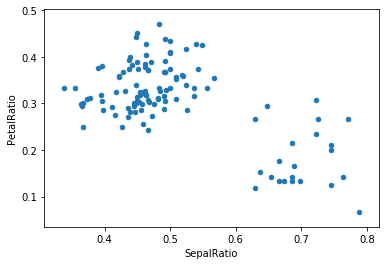

In [72]:
(iris.query('SepalLength > 5')
     .assign(SepalRatio=lambda x: x.SepalWidth / x.SepalLength,
             PetalRatio=lambda x: x.PetalWidth / x.PetalLength)
     .plot(kind='scatter', x='SepalRatio', y='PetalRatio'))

Since a function is passed in, the function is computed on the DataFrame being assigned to. Importantly, this is the DataFrame that’s been filtered to those rows with sepal length greater than 5. The filtering happens first, and then the ratio calculations. This is an example where we didn’t have a reference to the filtered DataFrame available.

The function signature for assign is simply **kwargs. The keys are the column names for the new fields, and the values are either a value to be inserted (for example, a Series or NumPy array), or a function of one argument to be called on the DataFrame. A copy of the original DataFrame is returned, with the new values inserted.

Changed in version 0.23.0.

Starting with Python 3.6 the order of **kwargs is preserved. This allows for dependent assignment, where an expression later in **kwargs can refer to a column created earlier in the same [assign()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.assign.html#pandas.DataFrame.assign).

In [73]:
dfa = pd.DataFrame({"A": [1, 2, 3],
                    "B": [4, 5, 6]})
dfa

,A,B
0,1,4
1,2,5
2,3,6


In [74]:
dfa.assign(C=lambda x: x['A'] + x['B'],
           D=lambda x: x['A'] + x['C'])

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


In [ ]:
## Indexing / selection


In [75]:
df.loc['b']

one              2
bar              2
flag         False
foo            bar
one_trunc        2
Name: b, dtype: object

In [76]:
df.iloc[2]

one             3
bar             3
flag         True
foo           bar
one_trunc     NaN
Name: c, dtype: object

For a more exhaustive treatment of sophisticated label-based indexing and slicing, see the [section on indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing). We will address the fundamentals of reindexing / conforming to new sets of labels in the [section on reindexing](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-reindexing).

### 2.5 Data alignment and arithmetic
Data alignment between DataFrame objects automatically align on both the columns and the index (row labels). Again, the resulting object will have the union of the column and row labels.

In [77]:
df = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
df2 = pd.DataFrame(np.random.randn(7, 3), columns=['A', 'B', 'C'])
df + df2

,A,B,C,D
0,-0.613251,0.379501,2.066726,NaN
1,-0.303248,1.059303,0.850137,NaN
2,-2.372462,0.737270,-0.165422,NaN
3,-1.556930,1.665810,0.080452,NaN
4,2.903088,2.430600,-0.613481,NaN
5,-2.257941,-0.500350,-1.447088,NaN
6,0.697286,-0.749848,2.119924,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


When doing an operation between DataFrame and Series, the default behavior is to align the Series index on the DataFrame columns, thus [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) row-wise. For example:

In [78]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,0.781288,-0.617231,0.682546,-0.201023
2,-0.986160,0.118506,-0.097197,-2.067760
3,-0.646831,-0.327964,0.081750,-0.069819
4,1.169520,0.135980,-1.410986,-0.400582
5,-0.391752,-0.958936,-0.394688,1.063256
6,1.373849,-1.973525,0.291934,-0.991445
7,0.841423,-0.376053,-1.670914,-2.249929
8,-0.065129,-0.211477,-0.328608,1.156507
9,0.646205,0.853679,-1.694073,0.742355


In the special case of working with time series data, if the DataFrame index contains dates, the broadcasting will be column-wise:

In [79]:
index = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=list('ABC'))
df

,A,B,C
2000-01-01,-0.345070,-0.407254,-0.836490
2000-01-02,-0.469611,-0.255668,0.181578
2000-01-03,0.434523,0.191322,0.956576
2000-01-04,-0.616479,-0.069760,0.171515
2000-01-05,2.178406,0.997570,-0.804679
2000-01-06,-2.282484,-0.040432,-0.972309
2000-01-07,0.576788,-0.421295,-1.722103
2000-01-08,-0.603377,1.143358,-0.997488


In [80]:
type(df['A'])

pandas.core.series.Series

In [81]:
df - df['A']

,2000-01-01 00:00:00,2000-01-02 00:00:00,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00,2000-01-06 00:00:00,2000-01-07 00:00:00,2000-01-08 00:00:00,A,B,C
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### Warning
df - df['A'] is now deprecated and will be removed in a future release. The preferred way to replicate this behavior is

In [82]:
df.sub(df['A'], axis=0)

,A,B,C
2000-01-01,0.0,-0.062184,-0.491420
2000-01-02,0.0,0.213943,0.651189
2000-01-03,0.0,-0.243201,0.522053
2000-01-04,0.0,0.546719,0.787994
2000-01-05,0.0,-1.180836,-2.983085
2000-01-06,0.0,2.242053,1.310175
2000-01-07,0.0,-0.998083,-2.298891
2000-01-08,0.0,1.746735,-0.394111


For explicit control over the matching and broadcasting behavior, see the section on [flexible binary operations](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-binop).

Operations with scalars are just as you would expect:

In [83]:
 df * 5 + 2

,A,B,C
2000-01-01,0.274651,-0.036270,-2.182450
2000-01-02,-0.348053,0.721660,2.907891
2000-01-03,4.172613,2.956610,6.782878
2000-01-04,-1.082396,1.651199,2.857574
2000-01-05,12.892031,6.987851,-2.023396
2000-01-06,-9.412422,1.797842,-2.861545
2000-01-07,4.883939,-0.106476,-6.610515
2000-01-08,-1.016883,7.716792,-2.987439


In [84]:
1 / df

,A,B,C
2000-01-01,-2.897964,-2.455471,-1.195472
2000-01-02,-2.129424,-3.911323,5.507269
2000-01-03,2.301376,5.226792,1.045396
2000-01-04,-1.622115,-14.334808,5.830401
2000-01-05,0.459051,1.002436,-1.242731
2000-01-06,-0.438119,-24.733120,-1.028480
2000-01-07,1.733740,-2.373632,-0.580685
2000-01-08,-1.657340,0.874616,-1.002518


In [85]:
df ** 4

,A,B,C
2000-01-01,0.014178,0.027508,0.489602
2000-01-02,0.048635,0.004273,0.001087
2000-01-03,0.035649,0.001340,0.837293
2000-01-04,0.144435,0.000024,0.000865
2000-01-05,22.519334,0.990316,0.419267
2000-01-06,27.141334,0.000003,0.893752
2000-01-07,0.110679,0.031503,8.795013
2000-01-08,0.132542,1.708951,0.989989


Boolean operators work as well:

In [86]:
df1 = pd.DataFrame({'a': [1, 0, 1], 'b': [0, 1, 1]}, dtype=bool)
df2 = pd.DataFrame({'a': [0, 1, 1], 'b': [1, 1, 0]}, dtype=bool)
df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [87]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [88]:
df1 ^ df2

,a,b
0,True,True
1,True,False
2,False,True


In [89]:
-df1

,a,b
0,False,True
1,True,False
2,False,False


### 2.6 Transposing
To transpose, access the T attribute (also the transpose function), similar to an ndarray:

In [90]:
# only show the first 5 rows
df[:5].T

,2000-01-01,2000-01-02,2000-01-03,2000-01-04,2000-01-05
A,-0.345070,-0.469611,0.434523,-0.616479,2.178406
B,-0.407254,-0.255668,0.191322,-0.069760,0.997570
C,-0.836490,0.181578,0.956576,0.171515,-0.804679


### 2.7 DataFrame interoperability with NumPy functions
Elementwise NumPy ufuncs (log, exp, sqrt, …) and various other NumPy functions can be used with no issues on Series and DataFrame, assuming the data within are numeric:

In [91]:
np.exp(df)

,A,B,C
2000-01-01,0.708171,0.665475,0.433229
2000-01-02,0.625246,0.774399,1.199108
2000-01-03,1.544226,1.210849,2.602768
2000-01-04,0.539842,0.932617,1.187102
2000-01-05,8.832219,2.711685,0.447231
2000-01-06,0.102030,0.960375,0.378209
2000-01-07,1.780311,0.656196,0.178690
2000-01-08,0.546962,3.137287,0.368805


In [92]:
np.asarray(df)

array([[-0.3450699 , -0.4072539 , -0.83648991],
       [-0.46961053, -0.25566796,  0.18157819],
       [ 0.43452259,  0.19132194,  0.95657566],
       [-0.61647925, -0.06976026,  0.17151478],
       [ 2.1784063 ,  0.9975702 , -0.80467918],
       [-2.2824843 , -0.04043161, -0.97230891],
       [ 0.57678784, -0.42129522, -1.72210299],
       [-0.60337664,  1.14335838, -0.9974879 ]])

DataFrame is not intended to be a drop-in replacement for ndarray as its indexing semantics and data model are quite different in places from an n-dimensional array.

[Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series) implements __array_ufunc__, which allows it to work with NumPy’s [universal functions](https://docs.scipy.org/doc/numpy/reference/ufuncs.html).
The ufunc is applied to the underlying array in a Series.

In [93]:
ser = pd.Series([1, 2, 3, 4])
np.exp(ser)

0     2.718282
1     7.389056
2    20.085537
3    54.598150
dtype: float64

Changed in version 0.25.0: When multiple Series are passed to a ufunc, they are aligned before performing the operation.

Like other parts of the library, pandas will automatically align labeled inputs as part of a ufunc with multiple inputs. For example, using numpy.remainder() on two [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series) with differently ordered labels will align before the operation.

In [95]:
ser1 = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
ser2 = pd.Series([1, 3, 5], index=['b', 'a', 'c'])
ser1

a    1
b    2
c    3
dtype: int64

In [96]:
ser2

b    1
a    3
c    5
dtype: int64

In [97]:
np.remainder(ser1, ser2)

a    1
b    0
c    3
dtype: int64

As usual, the union of the two indices is taken, and non-overlapping values are filled with missing values.

In [98]:
ser3 = pd.Series([2, 4, 6], index=['b', 'c', 'd'])
ser3

b    2
c    4
d    6
dtype: int64

In [99]:
np.remainder(ser1, ser3)

a    NaN
b    0.0
c    3.0
d    NaN
dtype: float64

When a binary ufunc is applied to a [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series) and [Index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.html#pandas.Index), the Series implementation takes precedence and a Series is returned.

In [100]:
ser = pd.Series([1, 2, 3])
idx = pd.Index([4, 5, 6])
np.maximum(ser, idx)

0    4
1    5
2    6
dtype: int64

NumPy ufuncs are safe to apply to [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series) backed by non-ndarray arrays, for example [arrays.SparseArray](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.arrays.SparseArray.html#pandas.arrays.SparseArray) (see [Sparse calculation](https://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#sparse-calculation)). If possible, the ufunc is applied without converting the underlying data to an ndarray.

### 2.8 Console display
Very large DataFrames will be truncated to display them in the console. You can also get a summary using [info()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html#pandas.DataFrame.info). (Here I am reading a CSV version of the baseball dataset from the plyr R package):

In [107]:
baseball = pd.read_csv('D:/Python/Libraries/pandas/basebase.csv')
print(baseball.shape)
baseball.head(3)

(21699, 22)


,id,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN
1,forceda01,1871,1,WS3,NaN,32,162,45,45,9,...,29.0,8.0,0.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,mathebo01,1871,1,FW1,NaN,19,89,15,24,3,...,10.0,2.0,1.0,2,0.0,NaN,NaN,NaN,NaN,NaN


In [108]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21699 entries, 0 to 21698
Data columns (total 22 columns):
id       21699 non-null object
year     21699 non-null int64
stint    21699 non-null int64
team     21699 non-null object
lg       21634 non-null object
g        21699 non-null int64
ab       21699 non-null int64
r        21699 non-null int64
h        21699 non-null int64
X2b      21699 non-null int64
X3b      21699 non-null int64
hr       21699 non-null int64
rbi      21687 non-null float64
sb       21449 non-null float64
cs       17174 non-null float64
bb       21699 non-null int64
so       20394 non-null float64
ibb      14171 non-null float64
hbp      21322 non-null float64
sh       20739 non-null float64
sf       14309 non-null float64
gidp     16427 non-null float64
dtypes: float64(9), int64(10), object(3)
memory usage: 3.6+ MB


However, using to_string will return a string representation of the DataFrame in tabular form, though it won’t always fit the console width:

In [109]:
print(baseball.iloc[-20:, :12].to_string())

              id  year  stint team  lg    g   ab   r    h  X2b  X3b  hr
21679  finlest01  2007      1  COL  NL   43   94   9   17    3    0   1
21680  embreal01  2007      1  OAK  AL    4    0   0    0    0    0   0
21681  edmonji01  2007      1  SLN  NL  117  365  39   92   15    2  12
21682  easleda01  2007      1  NYN  NL   76  193  24   54    6    0  10
21683  delgaca01  2007      1  NYN  NL  139  538  71  139   30    0  24
21684  cormirh01  2007      1  CIN  NL    6    0   0    0    0    0   0
21685  coninje01  2007      2  NYN  NL   21   41   2    8    2    0   0
21686  coninje01  2007      1  CIN  NL   80  215  23   57   11    1   6
21687  clemero02  2007      1  NYA  AL    2    2   0    1    0    0   0
21688  claytro01  2007      2  BOS  AL    8    6   1    0    0    0   0
21689  claytro01  2007      1  TOR  AL   69  189  23   48   14    0   1
21690  cirilje01  2007      2  ARI  NL   28   40   6    8    4    0   0
21691  cirilje01  2007      1  MIN  AL   50  153  18   40    9  

Wide DataFrames will be printed across multiple rows by default:

In [110]:
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.708384,1.598570,-0.576821,1.185423,-0.960049,1.150313,0.088829,-1.093288,-0.794874,1.033975,-0.213120,0.411666
1,-0.934938,0.560559,1.240016,0.265329,0.451702,0.985109,-1.048749,0.608408,1.263721,-0.010519,0.225216,-0.384567
2,-0.647460,-2.842720,0.047712,-1.412272,-0.778415,-1.551268,-2.328928,2.655466,-2.052643,-0.596020,1.760948,-0.323573


You can change how much to print on a single row by setting the display.width option:

In [112]:
pd.set_option('display.width', 40)  # default is 80
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.193991,-0.129094,0.571780,-0.555284,-0.498296,0.565947,-1.682524,-0.750819,-0.218091,-0.009804,1.299108,-1.232932
1,0.756373,-0.547323,1.592179,-1.441738,-0.134104,0.095648,-0.228073,-2.383206,0.526171,-1.301212,-0.625056,-0.195337
2,-1.390961,-0.040971,0.758098,0.925244,-0.626050,0.720435,-0.972758,0.460884,0.240794,0.503233,-0.519623,0.914107


You can adjust the max width of the individual columns by setting display.max_colwidth

In [113]:
datafile = {'filename': ['filename_01', 'filename_02'],
            'path': ["media/user_name/storage/folder_01/filename_01",
                     "media/user_name/storage/folder_02/filename_02"]}
pd.set_option('display.max_colwidth', 30)
pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/fo...
1,filename_02,media/user_name/storage/fo...


In [114]:
pd.set_option('display.max_colwidth', 100)
pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/folder_01/filename_01
1,filename_02,media/user_name/storage/folder_02/filename_02


You can also disable this feature via the expand_frame_repr option. This will print the table in one block.

### 2.9 DataFrame column attribute access and IPython completion
If a DataFrame column label is a valid Python variable name, the column can be accessed like an attribute:

In [115]:
df = pd.DataFrame({'foo1': np.random.randn(5),
                   'foo2': np.random.randn(5)})
df

,foo1,foo2
0,0.443938,-0.450274
1,0.272862,0.524564
2,-1.375406,1.670356
3,-0.367226,0.627357
4,-1.652465,-0.781747


In [116]:
df.foo1

0    0.443938
1    0.272862
2   -1.375406
3   -0.367226
4   -1.652465
Name: foo1, dtype: float64

The columns are also connected to the [IPython](https://ipython.org/) completion mechanism so they can be tab-completed:

In [ ]:
df.fo<TAB>

## The End!